In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,877 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,637 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,630 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 http://security.ubuntu.c

In [ ]:
!pip install pytesseract

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/NumberPlates/plate1.png')
img2 = cv2.imread('/content/drive/MyDrive/NumberPlates/plate2.jpg')
img3 = cv2.imread('/content/drive/MyDrive/NumberPlates/plate3.jpg')
img4 = cv2.imread('/content/drive/MyDrive/NumberPlates/plate4.jpeg')
img5 = cv2.imread('/content/drive/MyDrive/NumberPlates/plate5.jpeg')

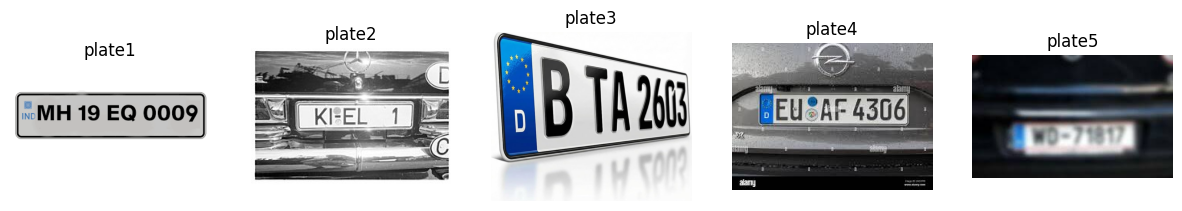

In [ ]:
#Display images (FIXED BGR - RGB issue)
def show_images(images, titles):
    plt.figure(figsize=(15,5))
    for i, img in enumerate(images):
        plt.subplot(1,5,i+1)
        if img is not None and not img.size == 0: # Check if the image loaded successfully and is not empty
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(titles[i])
        else:
            plt.text(0.5, 0.5, f"{titles[i]} (Failed to Load)",
                     horizontalalignment='center',
                     verticalalignment='center',
                     transform=plt.gca().transAxes,
                     fontsize=10, color='red')
            plt.title(titles[i])
        plt.axis("off")
    plt.show()

show_images([img1, img2, img3, img4, img5],
            ["plate1","plate2","plate3","plate4","plate5"])

In [ ]:
#Resize
imgs = [img1, img2, img3, img4, img5]
resized = [cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) for img in imgs]

In [ ]:
#Grayscale - Blur - Threshold
gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in resized]
blur = [cv2.GaussianBlur(img, (5,5), 0) for img in gray]
thresh = [cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)[1] for img in blur]

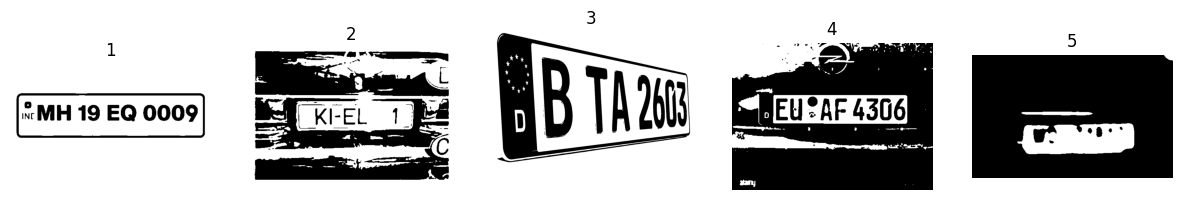

In [ ]:
#Preview thresholded images:
plt.figure(figsize=(15,5))
for i, img in enumerate(thresh):
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{i+1}")
    plt.axis('off')
plt.show()

In [ ]:
#OCR
def extract_text_from_image(image):
    ocr_data = pytesseract.image_to_data(
        image,
        output_type=pytesseract.Output.DICT,
        config='--psm 6'
    )

    detected_text = ""
    confidences = []

    for i in range(len(ocr_data['text'])):
        if ocr_data['text'][i].strip() != "":
            detected_text += ocr_data['text'][i] + " "
            conf = float(ocr_data['conf'][i])
            if conf > 0:
                confidences.append(conf)

    avg_conf = sum(confidences)/len(confidences) if confidences else 0
    return detected_text.strip(), avg_conf

In [ ]:
for i, img in enumerate(thresh, start=1):
    text, conf = extract_text_from_image(img)
    print(f"Image {i} → Text: {text}")
    print(f"Avg Confidence: {conf:.2f}\n")

Image 1 → Text: nc MH 19 EQ 0009
Avg Confidence: 96.00

Image 2 → Text: : 2 _K-EL 1 ea
Avg Confidence: 26.80

Image 3 → Text: “a as ~—_— * rf f j Dit
Avg Confidence: 26.83

Image 4 → Text: baRELI SAF 4306 eS
Avg Confidence: 31.67

Image 5 → Text: 
Avg Confidence: 0.00

